# Приложение, реализующее метод k-means. Выполнил Макаров Дмитрий ПИ-19-1
Данное приложение является программой, которую необходимо написать в рамках курса "Интеллектуальные системмы". Для правильного понимания метода k-means важно отрисовывать графики, поэтому было решено использовать Google colab. Но из-за этого очень затруднительно реализовать полный GUI, поэтому данное решение можно назвать немного ограниченным.

Здесь будут реализованы следующие функции:
* Подгрузка указанного файла .csv (из локального окружения);
* Сохранение в .csv файл полученных данных (с разделением на классы);
* Подсчёт классов (разделение до 5 классов, обычно разделение заканчивают на 4);
* Отображение инфографики. График точек до, график с обласстями (и точками для каждого k), график колено.

~ Прим. Также стоит отметить, что данный пример далёк от идеала. Во-первых, данная программа использует не готовоё решение по подсчёту k-means, поэтому он идеально способен просчитывать только численные значения переенных. В теории, это можно обойти при помощи кодирования строк, но это сильно расширит данные и т. д. Поэтому в данном примере работа ведётся только с численными признаками. Во-вторых, безусловно можно засовыватьь множество признаков, но графики буду отрисовываться только в случае 2D. Это связано с тем, что нормально отобразить что-то больше 3D пространства сложно, особенно на статичном графике.




Импорт библиотек

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math

Загрузка .csv файла из текущего окружения

In [60]:
# Вставьте имя файла, данные которго вы используете как входные
df = pd.read_csv('IS_data.csv', delimiter=';')

Входные данные

In [61]:
df

,Weight,Price
0,1,3
1,3,3
2,4,3
3,5,3
4,1,2
5,4,2
6,1,1
7,2,1
8,6,3
9,6,2


Отображение точек на графике

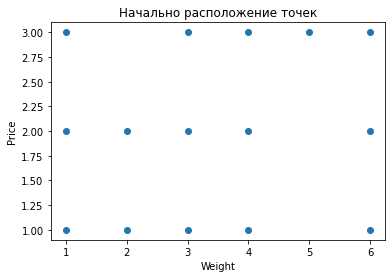

In [62]:
if (df.shape[1] == 2):
  plt.title("Начально расположение точек")
  plt.xlabel(df.columns[0])
  plt.ylabel(df.columns[1])
  plt.scatter(df.iloc[:, 0].tolist(), df.iloc[:, 1].tolist())
  plt.show

Главная функция распределения по кластерам

In [63]:
def DefineClaster(k, df):
  initial_centers = []
  centers = []

  # инициализируем начальные центры
  for i in range(k):
    not_initialized = True
    while(not_initialized):
      c = random.randint(0, df.shape[0] - 1)
      if (c not in initial_centers):
        initial_centers.append(c)
        not_initialized = False

  # добавляем их в массив
  for val in initial_centers:
    curr_center = []
    for i in range(df.shape[1]):
      curr_center.append(float(df.iloc[val][i]))
    centers.append(curr_center)
  
  # разделение на кластеры
  df['Claster'] = 0
  is_finished = False
  E = 0

  while(not is_finished):
    E = 0
    previous_centers = centers[:]
    calculated_space = []

    # Подсчёт расстояний
    for i in range(df.shape[0]):
      spaces = []
      for j in range(k):
        space = 0
        for h in range(df.shape[1] - 1):
          space += ((df.iloc[i][h] - centers[j][h])**2) 
        space = math.sqrt(space)
        spaces.append(space)
      calculated_space.append(spaces)
    
    # Определение минимального и определение кластера
    for i in range(df.shape[0]):
      claster = calculated_space[i].index(min(calculated_space[i])) + 1
      df.loc[i, 'Claster'] = claster
      E += min(calculated_space[i])**2
    
    # Переопределение центров
    for i in range(k):
      for h in range(df.shape[1] - 1):
        centers[i][h] = df.loc[df['Claster'] == i + 1, df.columns[h]].mean()

    # Сравнение центров для возможного выхода из цикла
    is_finished = True
    for i in range(k):
      for j in range(df.shape[1] - 1):
        if (previous_centers[i][j] != centers[i][j]):
          is_finished = False

  return E, df

Отрисовка графиков

In [64]:
def DrawClasterGraphics(df, k):
  if (df.shape[1] == 3):
    plt.title("График для k = {}".format(k))
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    for i in range(k):
      plt.scatter(df.loc[df['Claster'] == i + 1, df.columns[0]], df.loc[df['Claster'] == i + 1, df.columns[1]])
    plt.show

In [65]:
def DrawKmeansGraphics(df, Elist):
  if (df.shape[1] == 2):
    plt.title("Колено для кластеров")
    plt.xlabel("k")
    plt.ylabel("E")
    x = [2, 3, 4, 5]
    plt.plot(x, Elist)
    plt.show

Разделение по кластерам для различных k (2, 3, 4, 5). То, к какому кластеру принадлежит точка можно определить по её цвету.

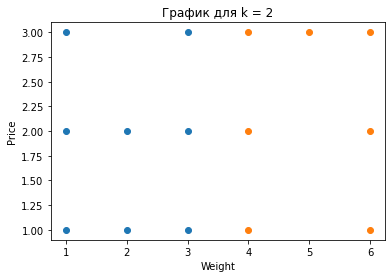

In [66]:
E_k2, df_k2 = DefineClaster(2, df.copy())
DrawClasterGraphics(df_k2, 2)

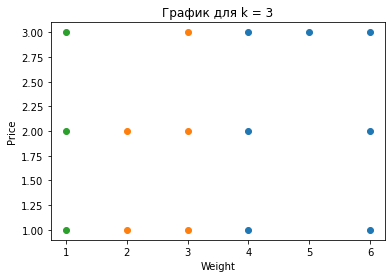

In [67]:
E_k3, df_k3 = DefineClaster(3, df.copy())
DrawClasterGraphics(df_k3, 3)

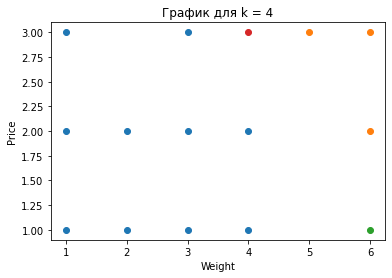

In [68]:
E_k4, df_k4 = DefineClaster(4, df.copy())
DrawClasterGraphics(df_k4, 4)

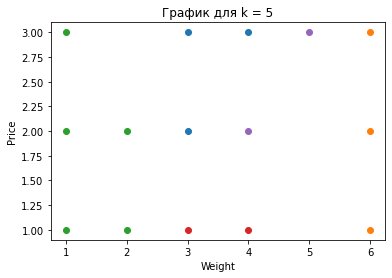

In [69]:
E_k5, df_k5 = DefineClaster(5, df.copy())
DrawClasterGraphics(df_k5, 5)

Далее будет отрисовка колена, отражающего отдаление точек от центров их кластеров.

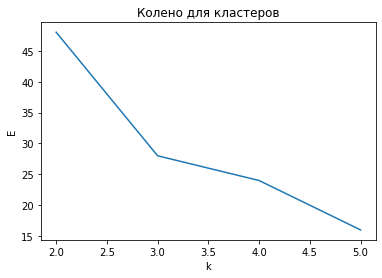

In [70]:
elist = [E_k2, E_k3, E_k4, E_k5]
DrawKmeansGraphics(df, elist)

Сохранение полученных данных в .csv файлы

In [71]:
df_k2.to_csv("IS_data_k2.csv", sep=';', encoding='utf-8')
df_k3.to_csv("IS_data_k3.csv", sep=';', encoding='utf-8')
df_k4.to_csv("IS_data_k4.csv", sep=';', encoding='utf-8')
df_k5.to_csv("IS_data_k5.csv", sep=';', encoding='utf-8')